<a href="https://colab.research.google.com/github/lakmg2007/SCALAR_LEARNINGS/blob/main/SupervisedLearningHandson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

data = {
    'Age':[25, 30, 45, 40, 55, 50],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F'],
    'Occupation': ['Engineer', 'Doctor', 'Doctor', 'Engineer', 'Lawyer', 'Lawyer'],
    'Income': [50000, np.nan, 80000, np.nan, 120000, 100000]
}
df = pd.DataFrame(data)
print("Original Data : \n")
df

Original Data : 



,Age,Gender,Occupation,Income
0,25,M,Engineer,50000.0
1,30,F,Doctor,NaN
2,45,M,Doctor,80000.0
3,40,F,Engineer,NaN
4,55,M,Lawyer,120000.0
5,50,F,Lawyer,100000.0


# **Imputation using mean**

In [9]:
mean_income = df['Income'].mean()
df_mean = df.copy()
df_mean['Income'].fillna(mean_income, inplace=True)
print("\n Mean Imputed: ", mean_income)
df_mean


 Mean Imputed:  87500.0


,Age,Gender,Occupation,Income
0,25,M,Engineer,50000.0
1,30,F,Doctor,87500.0
2,45,M,Doctor,80000.0
3,40,F,Engineer,87500.0
4,55,M,Lawyer,120000.0
5,50,F,Lawyer,100000.0


In [10]:
median_income = df['Income'].median()
df_median = df.copy()
df_median['Income'].fillna(median_income, inplace=True)
print("\n Median Imputed:", median_income)
df_median


 Median Imputed: 90000.0


,Age,Gender,Occupation,Income
0,25,M,Engineer,50000.0
1,30,F,Doctor,90000.0
2,45,M,Doctor,80000.0
3,40,F,Engineer,90000.0
4,55,M,Lawyer,120000.0
5,50,F,Lawyer,100000.0


# **Using Groupby**

In [12]:
df_group = df.copy()
df_group['Income'] = df_group.groupby('Occupation')['Income'].transform(lambda x: x.fillna(x.mean()))
print("\n Groupby occupation Imputation")
df_group


 Groupby occupation Imputation


,Age,Gender,Occupation,Income
0,25,M,Engineer,50000.0
1,30,F,Doctor,80000.0
2,45,M,Doctor,80000.0
3,40,F,Engineer,50000.0
4,55,M,Lawyer,120000.0
5,50,F,Lawyer,100000.0


# **How to Treat Outlier?**

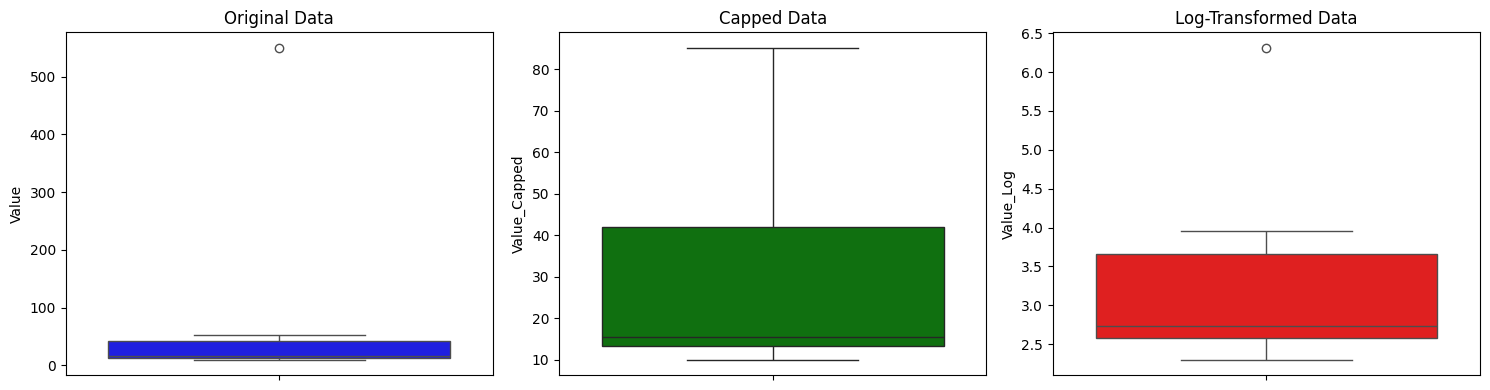

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = np.array([10,12,13,14,15,16,18,50,52,550])
df = pd.DataFrame({'Value': data})

Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

lower_cap = Q1-1.5 * IQR
upper_cap = Q3+ 1.5 * IQR

df['Value_Capped'] = df['Value'].clip(lower=lower_cap, upper=upper_cap)

df['Value_Log'] = np.log(df['Value'])

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.boxplot(y=df['Value'], color='blue')
plt.title('Original Data')

plt.subplot(1,3,2)
sns.boxplot(y=df['Value_Capped'], color='green')
plt.title('Capped Data')

plt.subplot(1,3,3)
sns.boxplot(y=df['Value_Log'], color='red')
plt.title('Log-Transformed Data')
plt.tight_layout()
plt.show()

# **Normalization & Standardization Formulas**

In [16]:
import pandas as pd
import numpy as np

data = pd.DataFrame({
    'Salary': [30000, 45000, 55000, 60000, 75000, 120000]
})
print("Original Data:\n", data)

Original Data:
    Salary
0   30000
1   45000
2   55000
3   60000
4   75000
5  120000


# **3. Standardization (Z-score)**

In [17]:
from sklearn.preprocessing import StandardScaler

scaler_std = StandardScaler()

data['Salary_Standardized'] = scaler_std.fit_transform(data[['Salary']])
print("\n Standardized Data\n", data[['Salary', 'Salary_Standardized']])



 Standardized Data
    Salary  Salary_Standardized
0   30000            -1.199159
1   45000            -0.672699
2   55000            -0.321725
3   60000            -0.146239
4   75000             0.380221
5  120000             1.959601


# **4. Min-Max Normalization**

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()

data['Salary_MinMax'] = scaler_minmax.fit_transform(data[['Salary']])
print("\n Min-Max Normalized Data:\n", data[['Salary', 'Salary_MinMax']])


 Min-Max Normalized Data:
    Salary  Salary_MinMax
0   30000       0.000000
1   45000       0.166667
2   55000       0.277778
3   60000       0.333333
4   75000       0.500000
5  120000       1.000000


# **1. Label Encoding (No inherent order)**